# Analyze A/B Test Results Project

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

<a id = 'intro'></a>
## Introduction

In this project, we work on ab_test about the conversion between pages. 
This project consits of 3 secions **Probability**, **A/B Test** and **Regression**

In [1]:
def find_proportion(a,b):
    """ This Function return the Precentage """
    return (a / b)*100

In [2]:
def find_probability(x,y):
    """ This Function return the Probability"""
    return x / y

In [3]:
def frequency_in_list(any_list, element):
    """This Function return the Frequency of Element choosen"""
    random_list = any_list
    frequency = {}
    
    for item in random_list:
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1
            
    return frequency[element]

<a id = 'probability'></a>
## Probability

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. 

a. **Read in the dataset and take a look at the top few rows here**

In [6]:
# Read dataset "ab_data"
df = pd.read_csv('ab_data.csv')

In [7]:
# Look at the top 10 rows in the dataset
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. **Find the number of rows in the dataset**

In [8]:
# To find the number of rows, we must use the shape
number_of_rows = df.shape[0]

In [9]:
print("The numbers of rows = {} rows.".format(number_of_rows))

The numbers of rows = 294478 rows.


c. **The number of unique users in the dataset**

In [10]:
# To find the number of unique users, we must use the nunique()
number_of_unique_users = df['user_id'].nunique()

In [11]:
print("The number of unique users = {} users.".format(number_of_unique_users))

The number of unique users = 290584 users.


d. **The proportion of users converted**

In [12]:
# Number of users converted  
number_of_users_converted = df.query('converted == 1')['user_id'].count()

In [13]:
# Proportion of users converted
proportion_of_users_converted = find_proportion(number_of_users_converted, number_of_unique_users)
print("Proportion of Users Converted = {}%".format(proportion_of_users_converted.round()))

Proportion of Users Converted = 12.0%


e. **The number of times the new_page and treatment don't line up**

In [14]:
# Number of group = "control" and landing_page = "new_page"
no_control_and_page = df.query('(group == "control" and landing_page == "new_page")').shape[0]

In [15]:
# Number of group = "treatment" and landing_page = "old"_page
no_treatment_and_old = df.query('(group == "treatment" and landing_page == "old_page")').shape[0]

In [16]:
print("Number of times the new_page and treatment don't line up = {} times.".format(no_control_and_page + no_treatment_and_old))

Number of times the new_page and treatment don't line up = 3893 times.


f. **Do any of the rows have missing values?**

In [17]:
# Info of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [18]:
"No missing Values" if df.isnull().sum()[0] == 0 else "There exist missing values"

'No missing Values'

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page

a. **Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz**

In [19]:
# Dataframe (control + old)
df_control_old = df.query('group == "control" and landing_page == "old_page"')

In [20]:
# Dataframe (treatment + new)
df_treatment_new = df.query('group == "treatment" and landing_page == "new_page"')

In [21]:
# New Dataframe
df_2 = pd.concat([df_control_old, df_treatment_new], sort = False).sort_index()

In [22]:
# Display a few rows of df_2
df_2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [23]:
# Show Info of df_2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [24]:
# Double Check all of the correct rows were removed - this should be 0
df_2[((df_2['group'] == 'treatment') == (df_2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df_2** and the cells below to answer questions

a. How many unique **user_id**s are in **df_2**?

In [25]:
number_of_unique_user_ids = df_2['user_id'].nunique()

In [26]:
print("The number of unique user ids = {} user ids.".format(number_of_unique_user_ids))

The number of unique user ids = 290584 user ids.


b. There is one **user_id** repeated in **df2**.  What is it?

In [27]:
df_3 = df_2[df_2['user_id'].duplicated() == True]

In [28]:
df_3

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [29]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2893 to 2893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       1 non-null      int64 
 1   timestamp     1 non-null      object
 2   group         1 non-null      object
 3   landing_page  1 non-null      object
 4   converted     1 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 48.0+ bytes


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df_2**.

In [30]:
# Find the duplicated rows
df_2[df_2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [31]:
# Drop neither 1899 or 2893
df_2 = df_2.drop(1899)

In [32]:
# Check the sum of duplicated rows after drop duplicated user_ids (must be zero)
df_2.duplicated().sum()

0

`4.` Use **df_2** in the below cells to answer the quiz questions

a. **What is the probability of an individual converting regardless of the page they receive?**

In [33]:
# Find the number of converting processes 
number_of_converting_processes = df_2.converted[df_2['converted'] == 1].count()

In [34]:
# Find the Probability
probability_of_converting = find_probability(number_of_converting_processes, number_of_unique_user_ids)

In [35]:
print("Probability of an individual converting regardless of the page they receive = {}".format(probability_of_converting))

Probability of an individual converting regardless of the page they receive = 0.11959708724499628


b. **Given that an individual was in the `control` group, what is the probability they converted?**

In [36]:
# Find the number control converting
number_of_control_converting = df_2.group[(df_2['group'] == 'control') & (df_2['converted'] == 1)].count()

In [37]:
# Find the number of individuals in control group
number_of_individuals_in_control = df_2.group[df['group'] == "control"].count()

In [38]:
# Find the Probability
probability_of_control_converting = find_probability(number_of_control_converting, number_of_individuals_in_control)

In [39]:
print("Probability of an individuals in control group who are converted = {}".format(probability_of_control_converting))

Probability of an individuals in control group who are converted = 0.1203863045004612


c. **Given that an individual was in the `treatment` group, what is the 
probability they converted?**

In [40]:
# Find the number treatment converting
number_of_treatment_converting = df_2.group[(df_2['group'] == 'treatment') & (df_2['converted'] == 1)].count()

In [41]:
# Find the number of individuals in treatment group
number_of_individuals_in_treatment = df_2.group[df['group'] == "treatment"].count()

In [42]:
# Find the Probability
probability_of_treatment_converting = find_probability(number_of_treatment_converting, number_of_individuals_in_treatment)

In [43]:
print("Probability of an individuals in treatment group who are converted = {}".format(probability_of_treatment_converting))

Probability of an individuals in treatment group who are converted = 0.11880806551510564


d. **What is the probability that an individual received the new page?**

In [44]:
# Number of Individuals
number_of_individuals = df_2.shape[0]
number_of_individuals

290584

In [45]:
# Number of received new_page
number_of_received_new_page = df_2.landing_page[df_2['landing_page'] == 'new_page'].count()
number_of_received_new_page

145310

In [46]:
# Find the Probability
probability_of_individual_received_new_page = find_probability(number_of_received_new_page, number_of_individuals)
probability_of_individual_received_new_page

0.5000619442226688

In [47]:
print("The Probability of individual received the new page = {}".format(probability_of_individual_received_new_page))

The Probability of individual received the new page = 0.5000619442226688


e. **Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions**

No, it dosen't seem one page leads more conversions. Since the difference between treatment and control is negligible about (0.00157824)

<a id = 'ab_test'></a>
## A/B Test

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Since the **$H_o$** and **$H_1$** are **computing** and **non-overlaping**.Then, we assume the following hypothses:

Null Hypothesis: The Old Page is the best
$$H_o: p_{old} - p_{new} \geq 0$$ <br></br>
Alternative Hypothesis: The Old Page is not the best
$$H_1: p_{old} - p_{new} < 0$$ <br></br>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

In [48]:
# Under the null hypothesis the p_new = p_old

a. What is the **convert rate** for $p_{new}$ under the null? 

In [49]:
# Number of all Pages (old or new)
no_all_pages = df_2['landing_page'].count()
no_all_pages

290584

In [50]:
# Number of Converted Transaction
no_converted = df_2.query("converted == 1").count()[0]
no_converted

34753

In [51]:
# Find Converted rate for p_new
p_new = find_probability(no_converted, no_all_pages)
print("P_new = ", p_new)

P_new =  0.11959708724499628


In [52]:
# Check the Correctness of converted rate for p_new - Should be Zero -
0 if p_new - df_2['converted'].mean() == 0 else -1

0

b. What is the **convert rate** for $p_{old}$ under the null?

In [53]:
p_old = p_new
print("P_old = ", p_old)

P_old =  0.11959708724499628


c. What is $n_{new}$?

In [54]:
# Number of New Pages
no_new_pages = df_2.query("landing_page == 'new_page'").count()[0]
print("Number of New Pages = {} Pages".format(no_new_pages))

Number of New Pages = 145310 Pages


d. What is $n_{old}$?

In [55]:
# Number of Old Pages
no_old_pages = no_all_pages - no_new_pages
print("Number of Old Pages = {} Pages".format(no_old_pages))

Number of Old Pages = 145274 Pages


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [56]:
# We use binomial distribution to simulate the transaction. binomial(n, p, size)
new_page_converted = np.random.binomial(1, p_new, no_new_pages)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [57]:
old_page_converted = np.random.binomial(1, p_old, no_old_pages)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [58]:
# Find The number of Converted in new_page_converted
no_converted_in_new_page = frequency_in_list(new_page_converted, 1)
no_converted_in_new_page

17421

In [59]:
# Find p_new For new_page_converted
p_new_1 = find_probability(no_converted_in_new_page, no_new_pages)
p_new_1

0.11988851421099718

In [60]:
# Find The number of Converted in old_page_converted
no_converted_in_old_page = frequency_in_list(old_page_converted, 1)
no_converted_in_old_page

17517

In [61]:
# Find p_old For old_page_converted
p_old_1 = find_probability(no_converted_in_old_page, no_old_pages)
p_old_1

0.12057904373803985

In [62]:
# Find the difference
p_new_1 - p_old_1

-0.0006905295270426687

In [63]:
# Check the correecteness of difference
0 if (p_new_1 - p_old_1) - (new_page_converted.mean() - old_page_converted.mean()) == 0 else -1

0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [64]:
p_diffs = []

new_converted_sim = np.random.binomial(no_new_pages, p_new, 10000) / no_new_pages
old_converted_sim = np.random.binomial(no_old_pages, p_old, 10000) / no_old_pages
p_diffs = new_converted_sim - old_converted_sim

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

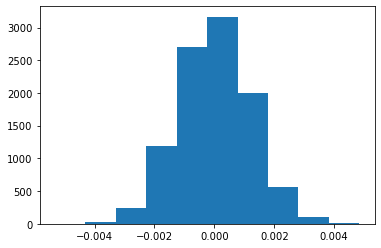

In [65]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [66]:
# Find Actual Observed difference
actual_observed_diff = probability_of_treatment_converting - probability_of_control_converting
actual_observed_diff

-0.0015782389853555567

In [67]:
# Convert p_diffs from list to array
p_diffs = np.array(p_diffs)

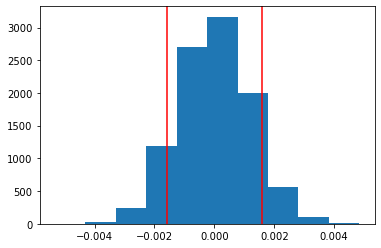

In [68]:
plt.hist(p_diffs);
plt.axvline(actual_observed_diff, color='red');
plt.axvline(p_diffs.mean() + (p_diffs.mean() - actual_observed_diff), color='red');

In [69]:
# Print P_value
print("P_Value = ", (actual_observed_diff < p_diffs).mean())

P_Value =  0.9064


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

1- This value is called **p_value** <br></br>
2- It means that, If the p-value were under 0.05, it would indicate a very low probability of, assuming the null hypothesis were true, finding a value equal to or significantly greater or lesser than observed_diff <br></br>
3- p_value in this problem is greater than 0.05, it means we do not have evidence to reject the null hypothesis 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [70]:
# Number of conversion in new page
n_new = df_2.query("landing_page == 'new_page'")['converted'].sum()

In [71]:
print("The Number of Conversions for New Page = ", n_new)

The Number of Conversions for New Page =  17264


In [72]:
# Number of conversion in old page
n_old = df_2.query("landing_page == 'old_page'")['converted'].sum()

In [73]:
print("The Number of Conversions for Old Page = ", n_old)

The Number of Conversions for Old Page =  17489


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value..

In [74]:
import statsmodels.api as sm

z_value, p_value = sm.stats.proportions_ztest([n_new, n_old], [no_new_pages, no_old_pages], alternative = "larger")

In [75]:
print("Z_Value = ", z_value)

Z_Value =  -1.3109241984234394


In [76]:
print("P_Value = ", p_value)

P_Value =  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z_Score** is computed the difference between conversions rate and null hyposesis.<br></br>

**P_Value** is less than 0.005. Its value is similar to the P_Value in J. This leads to fail to reject null hyposesis.  

<a id = 'regression'></a>
## Regression

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Type of Regression is **Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [77]:
# Add intercept column
df_2['intercept'] = 1
df_2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [78]:
# Add ab_page
df_2[['a_page', 'ab_page']] = pd.get_dummies(df_2['group'])
df_2 = df_2.drop('a_page', axis = 1)
df_2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [79]:
# To use logistic regression model, we must use sm.Logit from statsmodels
logistic_model = sm.Logit(df_2['converted'], df_2[['intercept', 'ab_page']])

In [80]:
# Save the result after fit() in results variable
results = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [81]:
# Show the summary of the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 May 2022   Pseudo R-squ.:               8.077e-06
Time:                        19:22:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

$H_o$: $p_{new} - p_{old} = 0$ <br></br>
$H_1$: $p_{new} - p_{old}\neq 0$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

At this point there's no exist any influence whether or not an individual converts. It's a good idea to add some factors into regression model<br></br>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [82]:
# Read countries.csv File
countries = pd.read_csv('countries.csv')

In [83]:
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [84]:
# Join Two Tables
df_2 = df_2.set_index('user_id').join(countries.set_index('user_id'))

In [85]:
df_2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [86]:
# Create 3 dummy variables
df_2[['CA', 'UK', 'US']] = pd.get_dummies(df_2['country'])

In [87]:
df_2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [88]:
# Apply Logistic Model
logit_model = sm.Logit(df_2['converted'], df_2[['intercept', 'ab_page', 'CA', 'UK']])

In [89]:
# Fit the logit_model
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [90]:
# Show the Summary of logit_model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 May 2022   Pseudo R-squ.:               2.323e-05
Time:                        19:22:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [91]:
# Create new 3 Columns
df_2['page_of_CA'] = df_2['CA']*df_2['ab_page']
df_2['page_of_US'] = df_2['US']*df_2['ab_page']
df_2['page_of_UK'] = df_2['UK']*df_2['ab_page']

In [92]:
df_2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,page_of_CA,page_of_US,page_of_UK
user_id,,,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [93]:
# Apply Logistic regession model
logit_model_1 = sm.Logit(df_2['converted'], df_2[['intercept', 'ab_page', 'UK', 'CA','page_of_CA', 'page_of_UK']])

In [94]:
# Fit the model
result_1 = logit_model_1.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [95]:
# Show the summary of logit_model_1
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 18 May 2022   Pseudo R-squ.:               3.482e-05
Time:                        19:22:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
page_of_CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
page_of_UK     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

## Conclusion

Initially, we let the the following hypotheses:<br></br>
Null Hypothesis: The Old Page is the best
$$H_o: p_{old} - p_{new} \geq 0$$ <br></br>
Alternative Hypothesis: The Old Page is not the best
$$H_1: p_{old} - p_{new} < 0$$ <br></br>

After applying Statistical concepts e.g. probability, a/b test, ... etc, we find that the value of **p_value** around **0.9** (p_value > 0.05). It means that there's no statistical evidence to reject the null hypothesis which say that **The Old page is better than the New page**. And we conclude that the company shouldn't the new page as it does not significant impact on conversion rates and rather continue with the old page. <br></br>

Finally, we use **Logistic Regession Model** on data to check the correctness of our hypotheses and predict the results. After fitting the model and show the summary of results, we find that There no exist any variable has significant p-values. Then, this leeds to fail to reject the null hypothesis and conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.

In [96]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'analyze_ab_test.ipynb'])

1